In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [61]:
animal_df = pd.read_csv('Datasets/Animal-Info.csv')

In [123]:
def remove_na(df):
    temp = df
    for column in temp.columns:
        temp = temp[(temp[column] != 'Varies') & (temp[column] != 'Not Applicable')]
    return temp

def average(item):
    item = item.replace(',', '')
    if item[-1] == 'm':
        split = item.split()
        item = f'{' '.join(split[:2])} {float(split[2][:-1])*1000}'
    if item.count('tons') > 0:
        split = item.split()
        item = f'{' '.join(split[:2])} {float(split[2])*1000}'
        
    if item.count('-') > 0:
        split = item.split('-')
        return (float(split[0]) + float(split[1]))/2
    if item.count('Up to') > 0:
        return float(item.split()[-1])/2
    only_nums = lambda x: ''.join([i for i in x if i.isnumeric()])
    return float(only_nums(item))

no_null = remove_na(animal_df)

In [124]:
clean = no_null.assign(Height = no_null['Height (cm)'].apply(average), 
                       Weight = no_null['Weight (kg)'].apply(average),
                       Lifespan = no_null['Lifespan (years)'].apply(average))

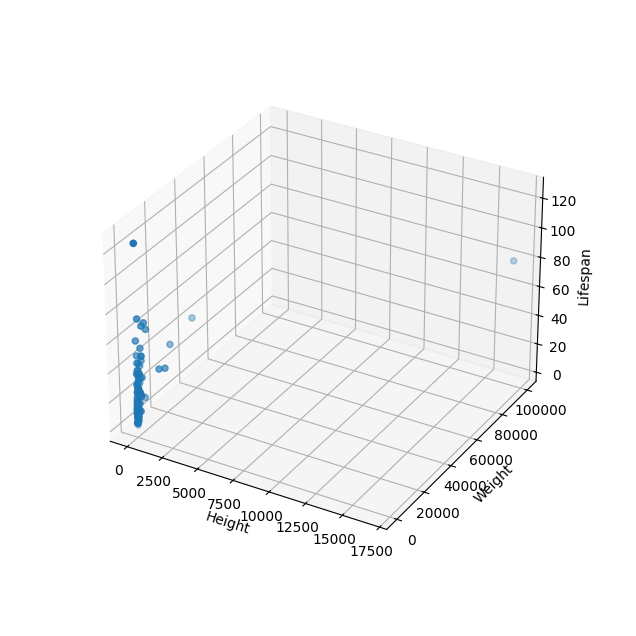

In [134]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(clean['Height'], clean['Weight'], clean['Lifespan'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Lifespan')
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()